In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
pd.options.display.float_format = '{:,.3f}'.format

In [9]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model

In [11]:
from tensorflow.keras.utils import plot_model

In [12]:
from numpy import isnan
from sklearn.impute import KNNImputer

In [13]:
#data WITHOUT near-zero value columns
data = pd.read_csv('data_prep_no_zv.csv')

In [14]:
#make sure dataset has only numbers
data = data.apply(pd.to_numeric)

In [15]:
print("Number of null values in dataset: ",data.isnull().values.sum())

Number of null values in dataset:  21545


### impute and scale dataframe

In [16]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [17]:
imputer = KNNImputer(n_neighbors=5)
data = pd.DataFrame(imputer.fit_transform(data),columns = data.columns)

In [18]:
print("Number of null values in dataset: ",data.isnull().values.sum())

Number of null values in dataset:  0


In [19]:
data['G21'].value_counts()

0.000    1553
0.500     217
1.000      78
Name: G21, dtype: int64

### prepare data fo model

In [20]:
# number of input columns
n_inputs = data.shape[1]-1 
print(n_inputs)

566


In [21]:
#load data and split to dependent and independent variables
X = data.loc[:, data.columns != 'G21'].values #select all but the desired one for y
y = data['G21'].values

#X and y are numpy ndarray type variables
print(X.shape,y.shape)

(1848, 566) (1848,)


In [22]:
X = np.array(X)
y = np.array(y)

In [23]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [24]:
print(X.shape,y.shape,X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1848, 566) (1848,) (1478, 566) (1478,) (370, 566) (370,)


### Build layers

In [25]:
# define encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [26]:
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [27]:
# bottleneck
n_bottleneck = round(float(n_inputs)/2.0)
bottleneck = Dense(n_bottleneck)(e)

In [28]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [29]:
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

In [30]:
# output layer
output = Dense(n_inputs, activation='linear')(d)
# from keras documentation: Activation function to use (see activations). If you don't specify anything, no activation
#is applied (ie. "linear" activation: a(x) = x)
#δηλαδη ειναι σαν να μην εχει μπει activation function καθολου, λογικο καθως θελω να παρω το input ως output

### compile

In [31]:
# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [32]:
# compile autoencoder model
#αν θελω και metrics οπως accuracy, πρεπει να το ορισω εδω, αλλιως μετα δεν επιστρεφονται στο evaluate
model.compile(optimizer='adam', loss='mse')

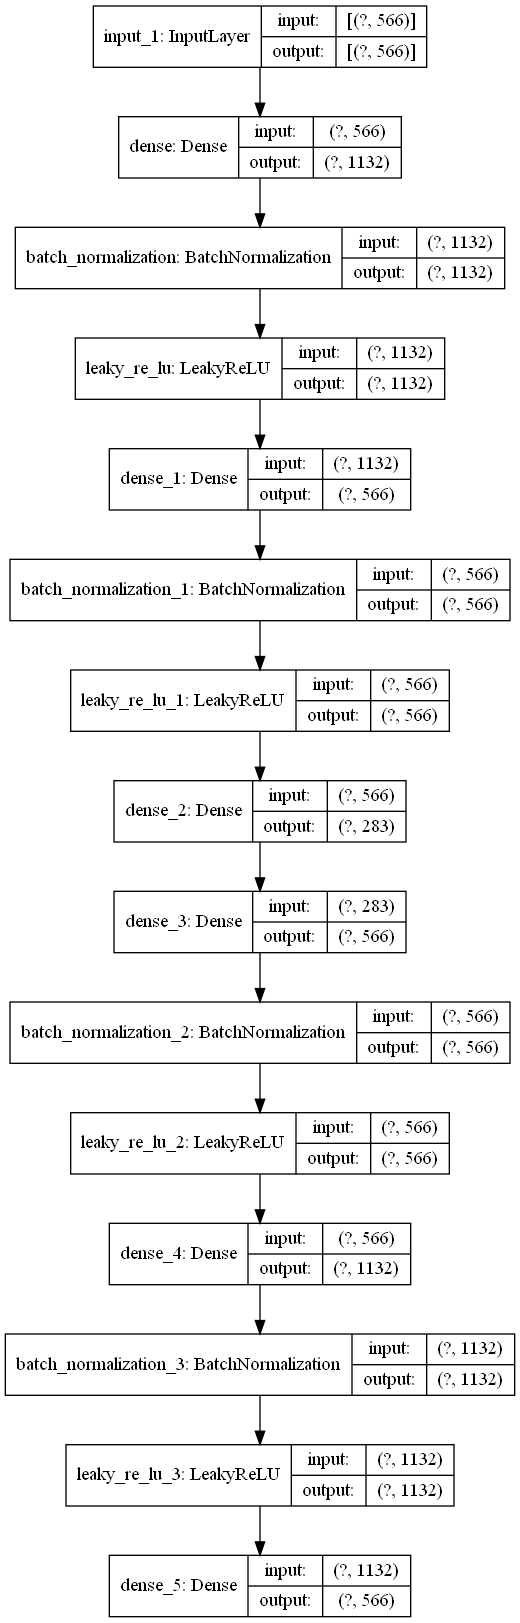

In [33]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress2.png', show_shapes=True)

### FIT

#### χρησιμοποιησα το validation split και οχι το validation_data, γτ φαινεται πως μαλλον το validation(Χ_test) και το training dataset (X_train)δεν ειναι το ιδιο αντιπροσωπευτικα 

In [34]:
history = model.fit(X_train,X_train, epochs=150, batch_size=16, verbose=2,validation_split=0.2)

Train on 1182 samples, validate on 296 samples
Epoch 1/150
1182/1182 - 4s - loss: 0.1391 - val_loss: 0.0760
Epoch 2/150
1182/1182 - 3s - loss: 0.0583 - val_loss: 0.0527
Epoch 3/150
1182/1182 - 3s - loss: 0.0550 - val_loss: 0.0482
Epoch 4/150
1182/1182 - 2s - loss: 0.0515 - val_loss: 0.0442
Epoch 5/150
1182/1182 - 2s - loss: 0.0479 - val_loss: 0.0445
Epoch 6/150
1182/1182 - 2s - loss: 0.0452 - val_loss: 0.0420
Epoch 7/150
1182/1182 - 2s - loss: 0.0429 - val_loss: 0.0406
Epoch 8/150
1182/1182 - 2s - loss: 0.0414 - val_loss: 0.0416
Epoch 9/150
1182/1182 - 3s - loss: 0.0387 - val_loss: 0.0390
Epoch 10/150
1182/1182 - 3s - loss: 0.0362 - val_loss: 0.0353
Epoch 11/150
1182/1182 - 3s - loss: 0.0352 - val_loss: 0.0383
Epoch 12/150
1182/1182 - 2s - loss: 0.0343 - val_loss: 0.0380
Epoch 13/150
1182/1182 - 2s - loss: 0.0331 - val_loss: 0.0335
Epoch 14/150
1182/1182 - 2s - loss: 0.0305 - val_loss: 0.0316
Epoch 15/150
1182/1182 - 3s - loss: 0.0292 - val_loss: 0.0316
Epoch 16/150
1182/1182 - 3s - lo

1182/1182 - 3s - loss: 0.0092 - val_loss: 0.0156
Epoch 133/150
1182/1182 - 2s - loss: 0.0094 - val_loss: 0.0155
Epoch 134/150
1182/1182 - 2s - loss: 0.0092 - val_loss: 0.0151
Epoch 135/150
1182/1182 - 2s - loss: 0.0090 - val_loss: 0.0151
Epoch 136/150
1182/1182 - 2s - loss: 0.0091 - val_loss: 0.0153
Epoch 137/150
1182/1182 - 2s - loss: 0.0090 - val_loss: 0.0153
Epoch 138/150
1182/1182 - 3s - loss: 0.0091 - val_loss: 0.0153
Epoch 139/150
1182/1182 - 3s - loss: 0.0090 - val_loss: 0.0151
Epoch 140/150
1182/1182 - 2s - loss: 0.0090 - val_loss: 0.0152
Epoch 141/150
1182/1182 - 2s - loss: 0.0089 - val_loss: 0.0155
Epoch 142/150
1182/1182 - 2s - loss: 0.0089 - val_loss: 0.0152
Epoch 143/150
1182/1182 - 2s - loss: 0.0088 - val_loss: 0.0155
Epoch 144/150
1182/1182 - 3s - loss: 0.0089 - val_loss: 0.0150
Epoch 145/150
1182/1182 - 3s - loss: 0.0087 - val_loss: 0.0154
Epoch 146/150
1182/1182 - 2s - loss: 0.0088 - val_loss: 0.0150
Epoch 147/150
1182/1182 - 2s - loss: 0.0087 - val_loss: 0.0150
Epoch 

In [35]:
# fit με ολο το dataset
#history = model.fit(X, X, epochs=120, batch_size=16, verbose=2,validation_split=0.2)

#### Evaluate με test set

##### The returned value of model.evaluate does contain loss and metrics. If it doesn't, the model wasn't compiled with metric, αλλα επισης μαλλον ισχυει: the accuracy function/metric in Keras is meant to be used with classification problems. It doesn't make any sense in this case. A better metric/loss is the mean squared error, because you're reconstructing the same features rather than predicting a class

In [36]:
model.evaluate(X_test, X_test,verbose=1)

#στο autoencoder απλα χρησιμοποιουμε το X_test και οχι y_test,καθως θελουμε να δουμε αν το εκανε reconstruct, δε θελουμε να
#βρουμε κλασεις οι οποιες βρισκονται στο y_test.
#To y_test το χωριζουμε απο πριν μαλλον για το classification, για να μην εκπαιδευθει μ αυτο

370/370 [==============================] - 0s 512us/sample - loss: 0.0157


0.015705507278845118

### plots for metrics

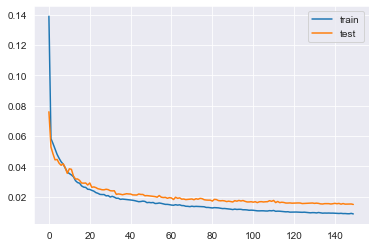

In [37]:
# plot 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
#plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['mse'], label='mse') #to mse einai idio me to loss
plt.legend()
plt.show()

#Example of Training Learning Curve Showing An Underfit Model That
#Does Not Have Sufficient Capacity

#### define an encoder model (without the decoder) & save to file

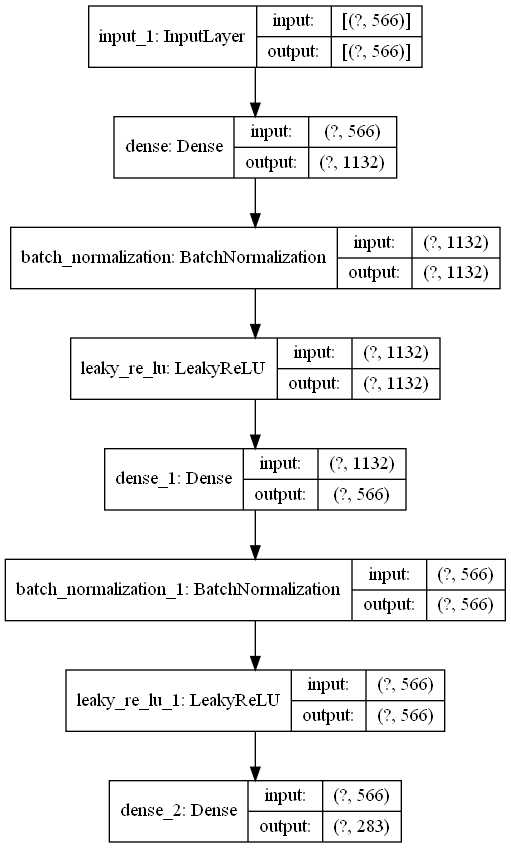

In [38]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress2.png', show_shapes=True)